# Web Scrapping and Natural Language Processing

---

we are going to extract infromation about **Tata Consultancy Services** from [**wikipedia**](https://en.wikipedia.org/wiki/Tata_Consultancy_Services) and do some Natural Language Processing

<code>[**Tata Consultancy Services**](https://www.tcs.com/)<code>

![](https://d3bzyjrsc4233l.cloudfront.net/news/TCS.png)

## About Data

Tata Consultancy Services (TCS) is an Indian multinational technology company that specializes in information technology (IT) services and consulting, headquartered in Mumbai, Maharashtra, India.

We are going to do some **web scrapping** on wikipedia about **Tata consultancy Services** and apply some **Natural Language Processing** Technique to them

---

## Web scrapping

---

In [1]:
# import libraries for web scrapping
import requests
from bs4 import BeautifulSoup

In [2]:
# which page you want to extract information from
url = "https://en.wikipedia.org/wiki/Tata_Consultancy_Services"

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

Response is 200 is good, So I can able to get result

In [5]:
# create object for BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Tata Consultancy Services - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YCMvjwpAICIAAE4V324AAADB","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Tata_Consultancy_Services","wgTitle":"Tata Consultancy Services","wgCurRevisionId":1005852042,"wgRevisionId":1005852042,"wgArticleId":284006,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","CS1 German-language sources (de)","CS1 maint: numeric names: authors list","All articles with dead external

In [7]:
# extraxt the particular information what we want by using the exact class on beautifulsoup
content = soup.find('div',{'class':'mw-parser-output'})

In [8]:
article = ''
for i in content.find_all('div'):
    article = article + ' ' + i.text

In [9]:
article

' Indian multinational technology company  This article contains content that is written like an advertisement. Please help improve it by removing promotional content and inappropriate external links, and by adding encyclopedic content written from a neutral point of view. (May 2020) (Learn how and when to remove this template message) TCS Office at SIPCOT, Siruseri Traded as BSE:\xa0532540NSE:\xa0TCSBSE SENSEX ConstituentNSE NIFTY 50 Constituent Tata Sons Area served Key people OutsourcingConsultingManaged services Operating income Net income Number of employees TCS ChinaTRDDC Contents\n\n1 History\n\n1.1 1968–2004\n1.2 2004 to present\n1.3 Acquisitions\n\n\n2 Products and services\n\n2.1 Service lines\n\n\n3 Operations\n\n3.1 Locations\n3.2 TCS BPS\n3.3 Tata Research Development and Design Centre\n3.4 Innovation Labs\n\n\n4 Employees\n5 Sponsorships\n6 Controversies\n\n6.1 Class action lawsuit\n6.2 Accusations of discrimination\n\n\n7 See also\n8 References\n9 External links\n\n Cont

---

## Natural Language Processing

---

In [10]:
# import nltk libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# import wordcloud library
from wordcloud import WordCloud

In [11]:
words = word_tokenize(article)

In [12]:
len(words)

8503

### Data Cleaning

In [13]:
import re

In [14]:
lem = WordNetLemmatizer()

In [15]:
corp = []
for i in range(0, len(words)):
    review = re.sub('[^a-zA-Z]', '', words[i])
    review = review.lower()
    review = lem.lemmatize(review)
    review = ''.join(review)
    corp.append(review)

In [16]:
len(corp)

8503

In [17]:
corp[:20]

['indian',
 'multinational',
 'technology',
 'company',
 'this',
 'article',
 'contains',
 'content',
 'that',
 'is',
 'written',
 'like',
 'an',
 'advertisement',
 '',
 'please',
 'help',
 'improve',
 'it',
 'by']

lot of empty values are present in the list **corp**, so we have to remove it. We have to remove unwanted **stopwords** from the list corp

In [18]:
# Remove stopwords and remove empty values
corp_1 = []
empty = ['']
for x in corp:
    if x not in set(stopwords.words('english')):
        if x not in empty:
            corp_1.append(x)

In [19]:
corp_1[:20]

['indian',
 'multinational',
 'technology',
 'company',
 'article',
 'contains',
 'content',
 'written',
 'like',
 'advertisement',
 'please',
 'help',
 'improve',
 'removing',
 'promotional',
 'content',
 'inappropriate',
 'external',
 'link',
 'adding']

In [20]:
len(corp_1)

4230

In [21]:
print(f'Total words are removed include stopwords and empty values :{len(corp) - len(corp_1)}')

Total words are removed include stopwords and empty values :4273


To know the word frequency we import **pandas**. By using pandas function **.value_counts()** we can easily calculate the frequency of the word

In [22]:
# import pandas library
import pandas as pd

In [23]:
# Convert corp_1 to pandas Series
series = pd.Series(corp_1)

In [25]:
series.value_counts()[:20]

retrieved      222
tc             213
tata           202
september      134
archived       104
original       100
service         79
india           66
consultancy     64
april           56
july            50
time            48
company         43
october         40
january         40
november        38
may             37
firm            30
december        28
acquires        28
dtype: int64

Still we have a lot of unwanted words from references(retrieved, archived, original, september...), So we have to remove it.
<br>We can create a list which contains frequent unwanted words from references and months

In [26]:
import calendar

In [34]:
unwanted_words = ['retrieved', 'archived', 'original']
for month_idx in range(1, 13):
    month = calendar.month_name[month_idx]
    unwanted_words.append(month.lower())

In [35]:
unwanted_words

['retrieved',
 'archived',
 'original',
 'january',
 'february',
 'march',
 'april',
 'may',
 'june',
 'july',
 'august',
 'september',
 'october',
 'november',
 'december']

In [36]:
# Remove unwanted words from corp_1
final_corp = []
for x in corp_1:
    if x not in unwanted_words:
        final_corp.append(x)

In [37]:
len(final_corp)

3303

In [38]:
# Now we create our Series once again
final_series = pd.Series(final_corp)

In [42]:
word_freq = final_series.value_counts()

In [43]:
word_freq[:20]

tc             213
tata           202
service         79
india           66
consultancy     64
time            48
company         43
firm            30
acquires        28
indian          27
business        26
group           25
economic        24
bank            20
hindu           18
pdf             18
top             18
market          16
r               16
billion         14
dtype: int64

*Now we have our cleaned data. We can implement our WordCloud*

In [41]:
# To plot the wordcloud we have to import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

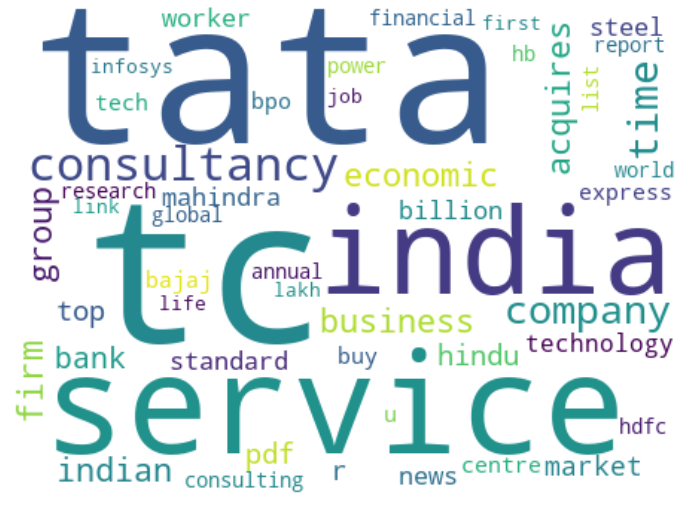

In [44]:
wc = WordCloud(width=450, height=330, max_words=50, background_color='white').generate_from_frequencies(word_freq)

plt.rcParams['figure.figsize'] = (12, 14)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()